In [5]:
import numpy as np
from MLP import MultiLayerPerceptronBig
from utils import print_results, calculate_accuracy
from matplotlib import pyplot as plt

### The corresponding output for each vector should be the sin() of a combination of the components. Specifically, for inputs:
### [x1 x2 x3 x4]
### the (single component) output should be:
### sin(x1-x2+x3-x4)

In [3]:
# Generate 500 vectors containing 4 components each. The value of each
# component should be a random number between -1 and 1. These will be
# your input vectors.
# Now train an MLP with 4 inputs, at least 5 hidden units and one output
# on 400 of these examples and keep the remaining 100 for testing.

X = np.random.uniform(-1, 1, (500, 4))
y = np.sin(X[:, 0] - X[:, 1] + X[:, 2] - X[:, 3]).reshape(-1, 1)

### First we will search for the best hyperparameters for the MLP

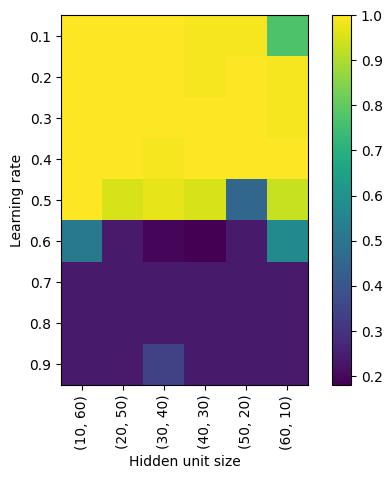

<Figure size 640x480 with 0 Axes>

In [7]:
hidden_unit_sizes = [10, 20, 30, 40, 50, 60]
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

total_accuracy = np.zeros((len(alpha_values), len(hidden_unit_sizes)))

def train_and_evaluate(alpha, h1_size, h2_size):
    # Create the MLP
    network = MultiLayerPerceptronBig(4, h1_size, h2_size, 1)

    # Train the MLP
    for epoch in range(1000):
        for value, target in zip(X[:400], y[:400]):
            network.train(value, target, alpha)

    # Calculate accuracy on test set
    return calculate_accuracy(network.forward(X[400:]), y[400:])

for i, learning_rate in enumerate(alpha_values):
    for j, hidden_unit_size in enumerate(hidden_unit_sizes):
        total_accuracy[i, j] = train_and_evaluate(learning_rate, hidden_unit_sizes[j], hidden_unit_sizes[j*-1 - 1])

# plot heat map
plt.imshow(total_accuracy, cmap='viridis')
plt.xticks(np.arange(len(hidden_unit_sizes)), zip(hidden_unit_sizes, hidden_unit_sizes[::-1]), rotation='vertical')
plt.xlabel('Hidden unit size')
plt.yticks(np.arange(len(alpha_values)), alpha_values)
plt.ylabel('Learning rate')
plt.colorbar()
plt.show()
location = "figures/mlp_learn_Sin_alpha_units"
plt.savefig(f"{location}.png")


### Now we will train the MLP with the best hyperparameters based on the previous search

Training set:
MSE: 4.1974454768240225e-05
MAE: 0.005341858996927855
accuracy: 0.9

Test set:
MSE: 4.403024320611836e-05
MAE: 0.005728143933992571
accuracy: 0.87


small test set:
[[-0.4720714]] -0.479425538604203
[[-0.18901438]] -0.19866933079506127


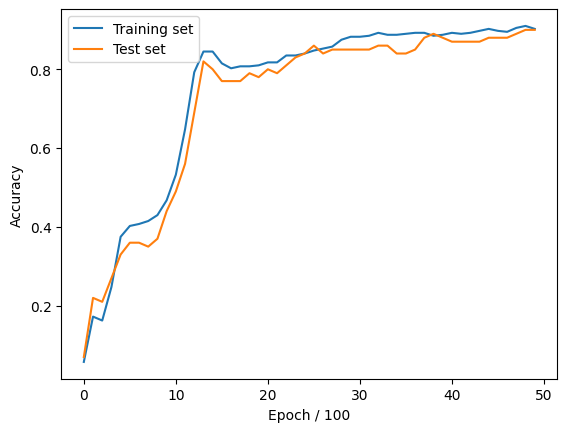

In [6]:

mlp = MultiLayerPerceptronBig(4, 20, 50, 1, activation='tanh')

accuracy_list = []
# Train the MLP
for epoch in range(5000):
    for value, target in zip(X[:400], y[:400]):
        mlp.train(value, target, 0.1)

    if epoch %100 == 0:
        train_accuracy = calculate_accuracy(mlp.forward(X[:400]), y[:400], 0.01)
        test_accuracy = calculate_accuracy(mlp.forward(X[400:]), y[400:], 0.01)
        accuracy_list.append((train_accuracy, test_accuracy))

# Calculate accuracy on test set and training set
print("Training set:")
print_results(mlp.forward(X[:400]), y[:400], 0.01)

# test the MLP on the remaining 100 examples
print("Test set:")
print_results(mlp.forward(X[400:]), y[400:], 0.01)

print("\nsmall test set:")
print(mlp.forward(np.array([0.25, 0.5, 0.75, 1.0])), np.sin(0.25 - 0.5 + 0.75 - 1.0))
print(mlp.forward(np.array([0.5, 0.6, 0.7, 0.8])), np.sin(0.5 - 0.6 + 0.7 - 0.8))

# plot accuracy over time
plt.plot(accuracy_list)
plt.xlabel('Epoch / 100')
plt.ylabel('Accuracy')
plt.legend(['Training set', 'Test set'])
plt.show()
